In [ ]:
# Nabiel Muhammad Imjauzanansyah
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error

Memuat dataset `diabetes.csv` ke dalam DataFrame menggunakan pandas.

In [ ]:
# 2. Load Dataset
df = pd.read_csv('diabetes.csv')


Menampilkan 5 baris pertama dari dataset untuk memahami struktur data.

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Memeriksa apakah ada nilai kosong atau null dalam dataset.

In [ ]:
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Menampilkan ringkasan statistik dari setiap kolom numerik pada dataset.
dan juga Dari grafik terlihat bahwa jumlah data dengan label 0 (tidak diabetes) lebih banyak dibanding label 1 (diabetes), yang mengindikasikan adanya ketidakseimbangan kelas. Ini penting diperhatikan saat melatih model, karena model bisa cenderung memprediksi kelas mayoritas.



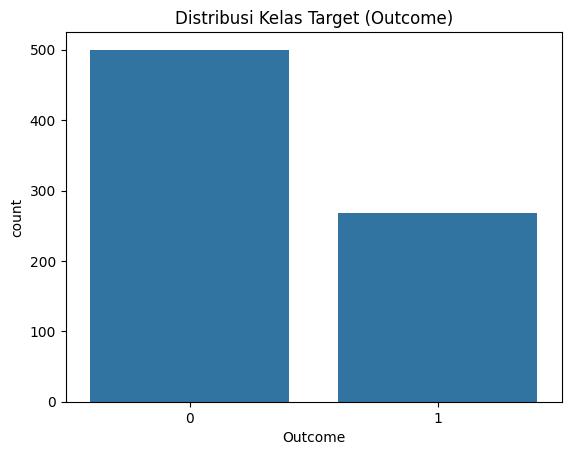

In [ ]:
sns.countplot(data=df, x='Outcome')
plt.title('Distribusi Kelas Target (Outcome)')
plt.show()


Membuat heatmap korelasi antar fitur untuk melihat hubungan antar variabel.

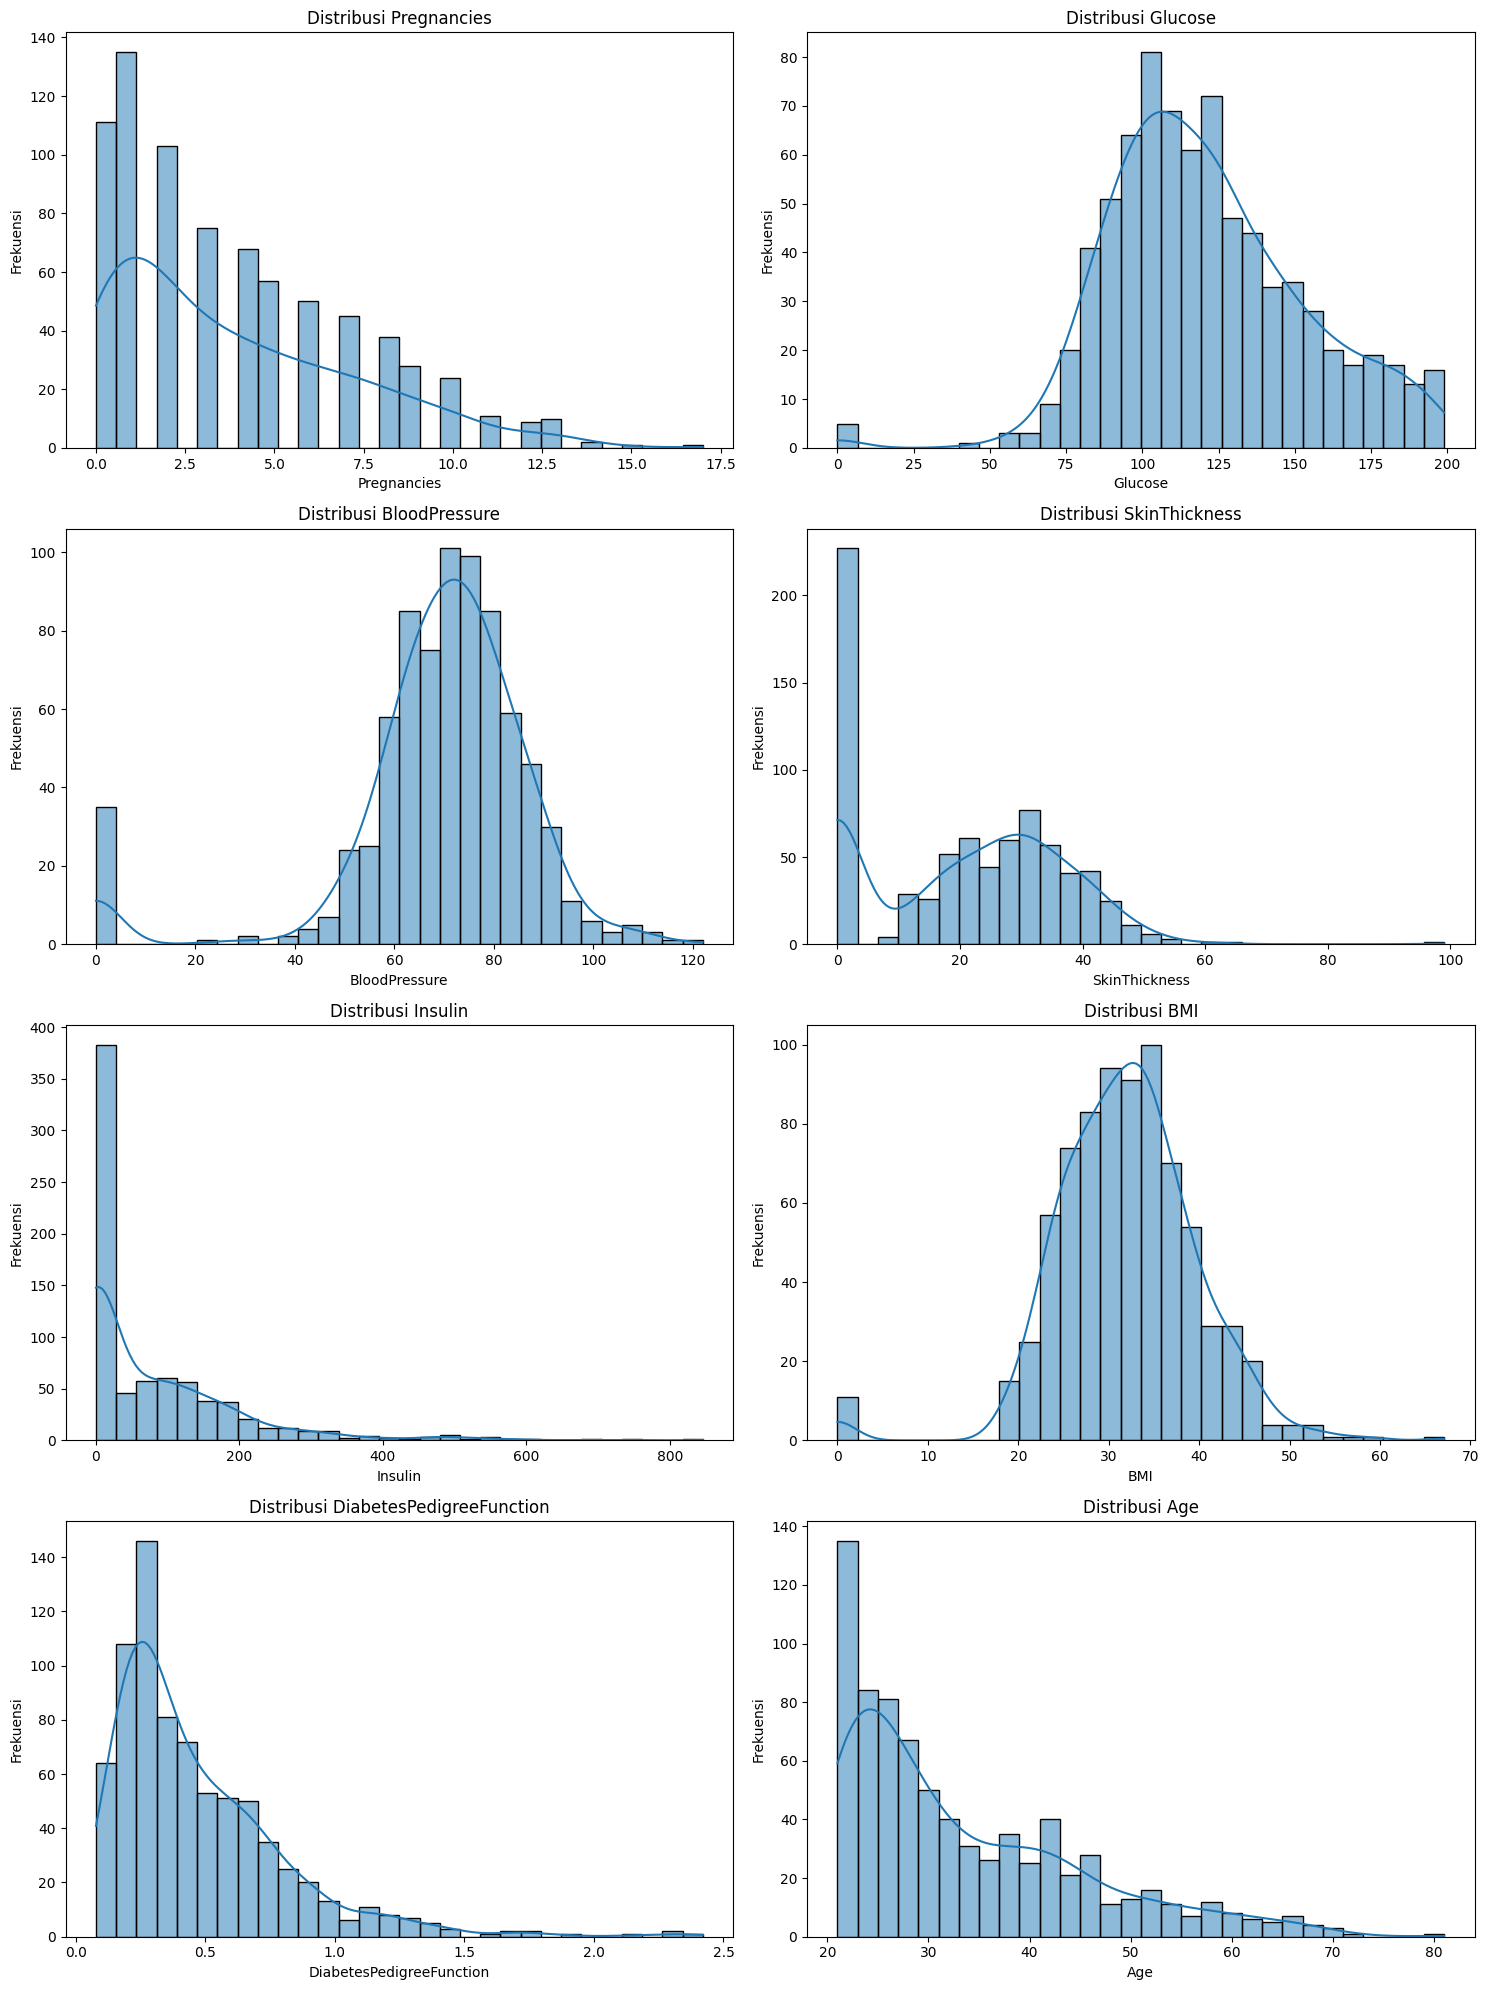

In [ ]:
features = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(features):
    plt.subplot(4, 2, i + 1)
    # Menggunakan df[col] untuk mengakses data kolom dari DataFrame
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Memisahkan fitur (X) dan label (y) dari dataset untuk keperluan pelatihan model.

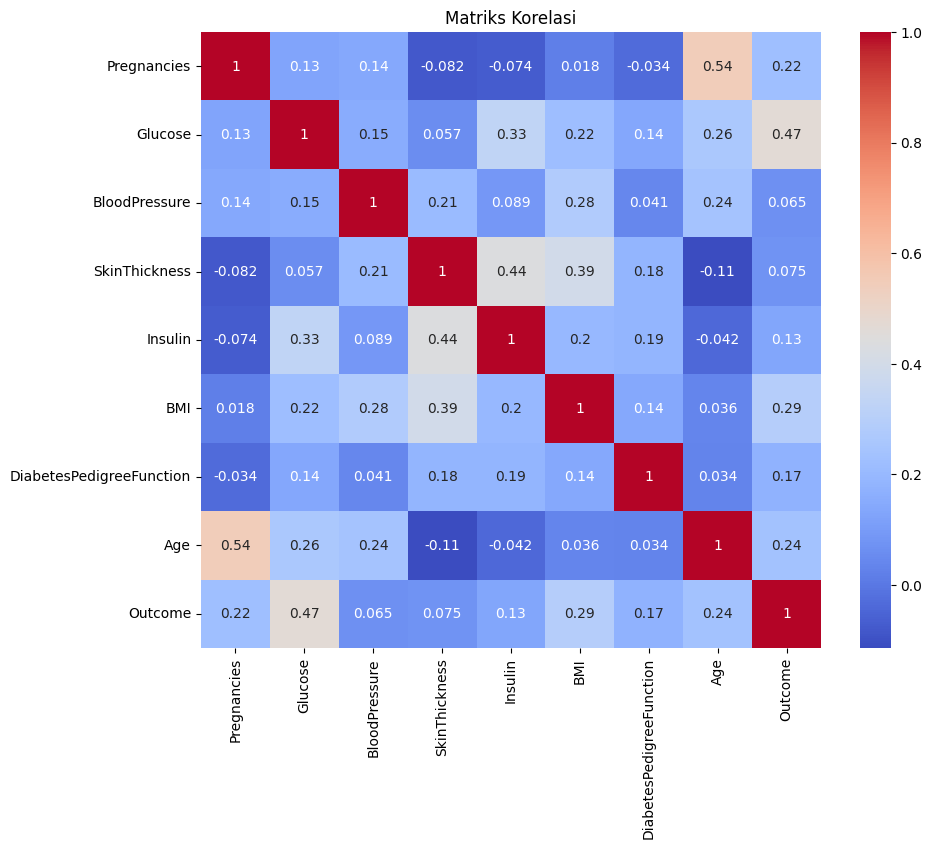

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


# Split Data
Membagi dataset menjadi data latih dan data uji dengan rasio tertentu (misalnya 80:20).

In [ ]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())


Melakukan normalisasi pada fitur agar memiliki skala yang seragam.

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Menghitung akurasi model terhadap data uji. dengan model K-Nearest Neighbors

In [ ]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    print(f"--- Metrics for {name} ---")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Akurasi: {accuracy:.2f}")
    print(f"Presisi: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("-" * 30)

--- Metrics for K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

Akurasi: 0.73
Presisi: 0.61
Recall: 0.69
F1-score: 0.65
------------------------------


Melakukan prediksi dan menampilkan metrik evaluasi seperti confusion matrix dan classification report.

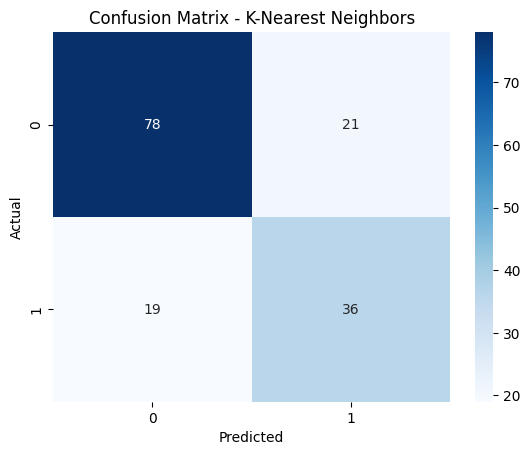

In [ ]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()